In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_colwidth', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quran-vs-bible/all-MiniLM-L12-v2_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/msmarco_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/google_USE_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/MiniLM_L6_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/ensemble_preds_most_sim_pairs_quran_and_old_testament.csv
/kaggle/input/quran-vs-bible/mpnet_v2_similarities_between_quran_and_torah.csv


in this notebook we will be using this dataset [Quran vs Torah](https://www.kaggle.com/datasets/mobassir/quran-vs-bible)

we will use these 5 datasets,

1. all-MiniLM-L12-v2_similarities_between_quran_and_torah.csv

2. msmarco_similarities_between_quran_and_torah.csv

3. google_USE_similarities_between_quran_and_torah.csv

4. MiniLM_L6_similarities_between_quran_and_torah.csv

5. mpnet_v2_similarities_between_quran_and_torah.csv

the idea of this notebook is similar to ensemble approach. we pick the verses pairs from each dataframe with highest confident score (we take the decision based on histogram score distribution), then we merge all the filtered dataset and drop duplicates except first. then we sort the final filtered dataset and save that dataset for next level research.

In [2]:
minilml12 = pd.read_csv('/kaggle/input/quran-vs-bible/all-MiniLM-L12-v2_similarities_between_quran_and_torah.csv')
msmarco = pd.read_csv('/kaggle/input/quran-vs-bible/msmarco_similarities_between_quran_and_torah.csv')
use = pd.read_csv('/kaggle/input/quran-vs-bible/google_USE_similarities_between_quran_and_torah.csv')
minilml6 = pd.read_csv('/kaggle/input/quran-vs-bible/MiniLM_L6_similarities_between_quran_and_torah.csv')
mpnetv2 = pd.read_csv('/kaggle/input/quran-vs-bible/mpnet_v2_similarities_between_quran_and_torah.csv')

In [3]:
minilml12['similarity_score'] = minilml12['similarity_score'] * 100
minilml12['similarity_score'] =minilml12['similarity_score'].astype(int)
msmarco['similarity_score'] = msmarco['similarity_score'] * 100
msmarco['similarity_score'] =msmarco['similarity_score'].astype(int)
use['similarity_score'] = use['similarity_score'] * 100
use['similarity_score'] =use['similarity_score'].astype(int)
minilml6['similarity_score'] = minilml6['similarity_score'] * 100
minilml6['similarity_score'] =minilml6['similarity_score'].astype(int)
mpnetv2['similarity_score'] = mpnetv2['similarity_score'] * 100
mpnetv2['similarity_score'] =mpnetv2['similarity_score'].astype(int)

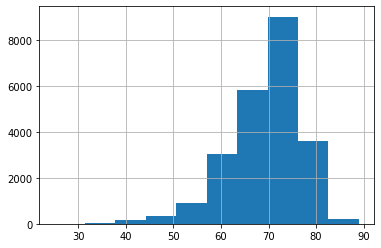

In [4]:
minilml12['similarity_score'].hist()

top_minilml12 = minilml12[minilml12['similarity_score']>75]

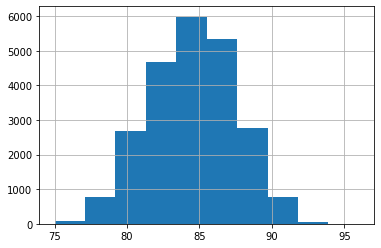

In [5]:
msmarco['similarity_score'].hist()

top_msmarco = msmarco[msmarco['similarity_score']>88]

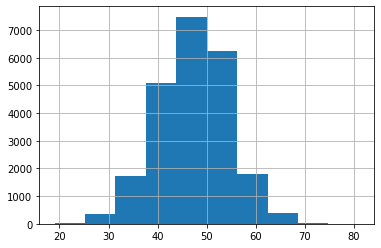

In [6]:
use['similarity_score'].hist()

top_use = use[use['similarity_score']>65]

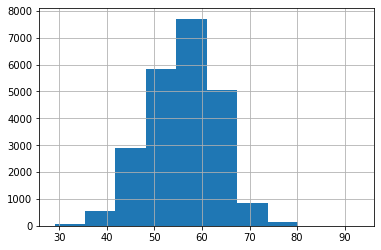

In [7]:
minilml6['similarity_score'].hist()

top_minilml6 = minilml6[minilml6['similarity_score']>70]

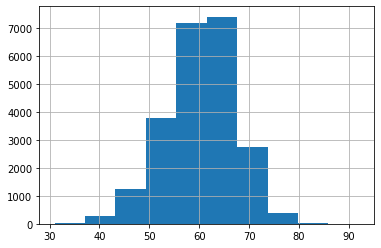

In [8]:
mpnetv2['similarity_score'].hist()

top_mpnetv2 = mpnetv2[mpnetv2['similarity_score']>70]

In [9]:
top_minilml12 = top_minilml12.reset_index(drop=True)
top_msmarco = top_msmarco.reset_index(drop=True)
top_use = top_use.reset_index(drop=True)
top_minilml6 = top_minilml6.reset_index(drop=True)
top_mpnetv2 = top_mpnetv2.reset_index(drop=True)

In [10]:
len(top_minilml12), len(top_msmarco), len(top_use), len(top_minilml6), len(top_mpnetv2)

(4950, 1845, 213, 371, 1217)

In [11]:
merged_df = pd.concat([top_minilml12,top_msmarco,top_use,top_minilml6,top_mpnetv2],ignore_index=True)
merged_df = merged_df.reset_index(drop=True)

In [12]:
len(merged_df)

8596

In [13]:
merged_df = merged_df.drop_duplicates(subset=merged_df.columns.difference(['similarity_score']), keep='first')


In [14]:
merged_df.head(2)

,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
0,Exodus 7:6,Exodus,7,6,"And Moses and Aaron did as the LORD commanded them, so did they. \n",The Poets,26,48,The Lord of Moses and Aaron.,89
1,Exodus 2:15,Exodus,2,15,"Now when Pharaoh heard this thing, he sought to slay Moses. But Moses fled from the face of Pharaoh, and dwelt in the land of Midian: and he sat down by a well. \n",The Believer,40,26,"And Pharaoh said: Suffer me to kill Moses, and let him cry unto his Lord. Lo! I fear that he will alter your religion or that he will cause confusion in the land.",88


In [15]:
merged_df = merged_df.sort_values(by=['similarity_score'], ascending=False)
merged_df = merged_df.reset_index(drop=True)

In [16]:
merged_df.head()

,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
0,Jeremiah 51:15,Jeremiah,51,15,"He hath made the earth by his power, he hath established the world by his wisdom, and hath stretched out the heaven by his understanding. \n",The Bee,16,3,He hath created the heavens and the earth with truth. High be He Exalted above all that they associate (with Him).,93
1,Deuteronomy 10:14,Deuteronomy,10,14,"Behold, the heaven and the heaven of heavens is the LORD's thy God, the earth also, with all that therein is. \n",Smoke,44,7,"Lord of the heavens and the earth and all that is between them, if ye would be sure.",93
2,Psalms 119:67,Psalms,119,67,Before I was afflicted I went astray: but now have I kept thy word. \n,The Poets,26,20,"He said: I did it then, when I was of those who are astray.",93
3,Deuteronomy 10:20,Deuteronomy,10,20,"Thou shalt fear the LORD thy God; him shalt thou serve, and to him shalt thou cleave, and swear by his name. \n",Those Who Drag Forth,79,19,Then I will guide thee to thy Lord and thou shalt fear (Him).,93
4,Genesis 12:20,Genesis,12,20,"And Pharaoh commanded his men concerning him: and they sent him away, and his wife, and all that he had. \n",Hûd,11,97,"Unto Pharaoh and his chiefs, but they did follow the command of Pharaoh, and the command of Pharaoh was no right guide.",93


In [17]:
len(merged_df)

7963

<AxesSubplot:>

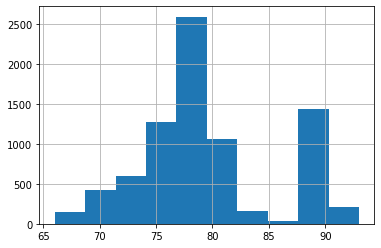

In [18]:
merged_df['similarity_score'].hist()

In [19]:
merged_df.to_csv("ensemble_preds_most_sim_pairs_quran_and_old_testament.csv",index = False)

In [20]:

merged_df.iloc[-5:].t_text

7958                                                                                                                                                                                                                                  And Mizpeh, and Chephirah, and Mozah, \n
7959    And when the LORD raised them up judges, then the LORD was with the judge, and delivered them out of the hand of their enemies all the days of the judge: for it repented the LORD because of their groanings by reason of them that oppressed them and vexed them. \n
7960                                                            And Moses said unto Pharaoh, Glory over me: when shall I entreat for thee, and for thy servants, and for thy people, to destroy the frogs from thee and thy houses, that they may remain in the river only? \n
7961                                                                                                                                                                                       

In [21]:
merged_df.iloc[-5:].q_Verse

7958                                                                                                                                                                                                                                                               And olive-trees and palm-trees
7959                                                                                                     Then lo! thy Lord - for those who became fugitives after they had been persecuted, and then fought and were steadfast - lo! thy Lord afterward is (for them) indeed Forgiving, Merciful.
7960    And Moses said: Our Lord! Lo! Thou hast given Pharaoh and his chiefs splendour and riches in the life of the world, Our Lord! that they may lead men astray from Thy way. Our Lord! Destroy their riches and harden their hearts so that they believe not till they see the painful doom.
7961                                                                                                                              